<a href="https://colab.research.google.com/github/Ary1709/Inteligencia-artificial-1843799/blob/main/PIA_IA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importar librerías 
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mnist=keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

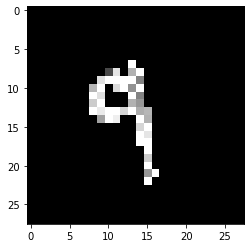

In [ ]:
# para las test
i=0
f=0
imagenestest_dataset = []
etiquetastest_dataset = []
while(i<200):

  file = '/content/'+str(i)+'.png'
  test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE )
  img_resized = cv2.resize(test_image, (28,28), )
  img_resized = cv2.bitwise_not(img_resized)

  # Preview de imagen reformateada
  Numeros='/content/'+str(i)+'.png'
  plt.imshow(img_resized, cmap='gray')
  if(f==9):
    imagenestest_dataset.append(img_resized)
    etiquetastest_dataset.append(f)
    
    f=0
  else :
    imagenestest_dataset.append(img_resized)
    etiquetastest_dataset.append(f)
   
    f=f+1
  i=i+1
imagenesnetest=np.array(imagenestest_dataset)
newetiquetatest=np.array(etiquetastest_dataset)

In [ ]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

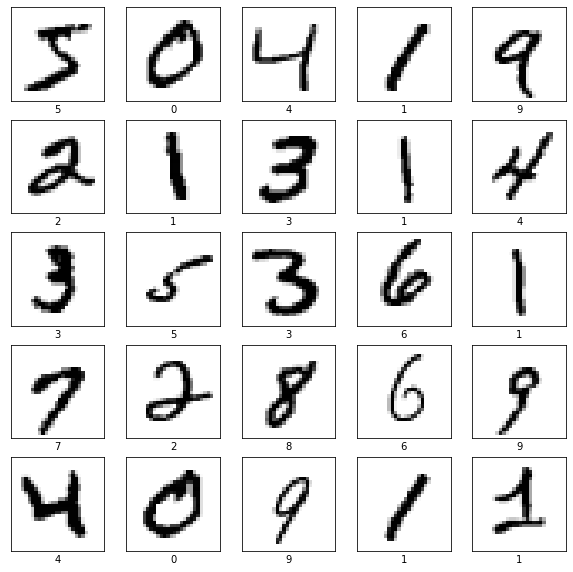

In [ ]:
i=0
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
imagenesnetest.shape


(200, 28, 28)

In [ ]:
newetiquetatest.shape

(200,)

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.6323 - accuracy: 0.8538
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4186 - accuracy: 0.9049
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3031 - accuracy: 0.9250
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2524 - accuracy: 0.9374
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2334 - accuracy: 0.9426
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2135 - accuracy: 0.9470
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2085 - accuracy: 0.9493
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1862 - accuracy: 0.9533
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1882 - accuracy: 0.9543
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.185

In [ ]:
test_loss, test_acc = model.evaluate(imagenesnetest, newetiquetatest, verbose=2)

print('\nTest accuracy:', test_acc)

7/7 - 0s - loss: 11.3334 - accuracy: 0.3500 - 181ms/epoch - 26ms/step

Test accuracy: 0.3499999940395355


In [ ]:
predictions = model.predict(imagenesnetest)

7/7 [==============================] - 0s 2ms/step


In [ ]:
predictions[0]

array([9.9999911e-01, 9.5413980e-17, 3.2188119e-09, 9.8002857e-17,
       1.2847180e-07, 1.3382662e-12, 6.2439136e-07, 1.1762544e-08,
       7.2940326e-21, 9.7094045e-08], dtype=float32)

In [ ]:
np.argmax(predictions[0])

0

In [ ]:
newetiquetatest[0]

0

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

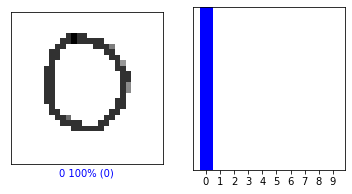

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], newetiquetatest, imagenesnetest)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  newetiquetatest)
plt.show()

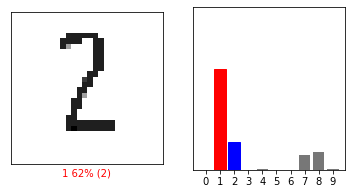

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], newetiquetatest, imagenesnetest)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  newetiquetatest)
plt.show()

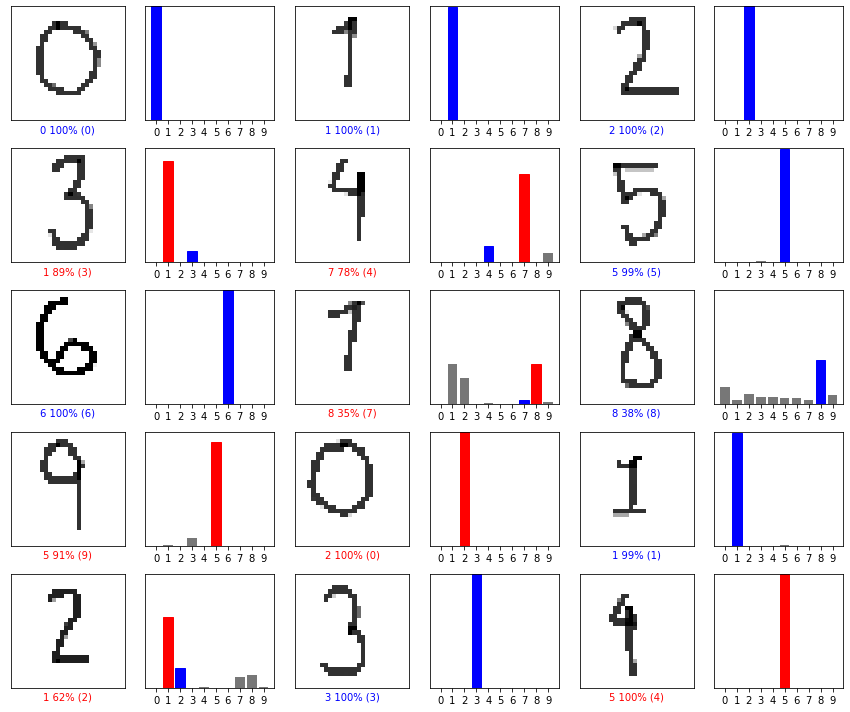

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], newetiquetatest, imagenesnetest)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], newetiquetatest)
plt.tight_layout()
plt.show()

In [ ]:
img = imagenesnetest[1]

print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 18ms/step
[[3.4607121e-13 9.9569416e-01 4.2014220e-04 3.6329688e-03 9.2445322e-12
  2.5249494e-04 4.8337956e-10 3.5537736e-12 2.2741084e-07 1.7096115e-14]]


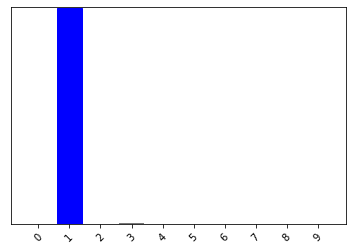

In [ ]:
plot_value_array(1, predictions_single[0], newetiquetatest)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

1